<a href="https://colab.research.google.com/github/merlin-cba/TP_Reconocimiento_Video/blob/main/Uso_de_Modelo_Preentrenado_imgenes_de_dia_noche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Crear las carpetas para subir las imagenes
!mkdir dias
!mkdir noches
!mkdir amanecer

In [ ]:
#!rm /content/Nig*.jpeg

In [ ]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd amanecer
!unzip /content/amanecer.zip
%cd ..

%cd noches
!unzip /content/noche.zip
%cd ..

%cd dias
!unzip /content/dia.zip
%cd ..

In [ ]:
#Borrar los archivo ZIP
!rm -rf /content/dias/dia.zip
!rm -rf /content/noches/noche.zip
!rm -rf /content/amanecer/amanecer.zip

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/dias | wc -l #475
!ls /content/noches | wc -l #515
!ls /content/amanecer | wc -l #419

920
763
988


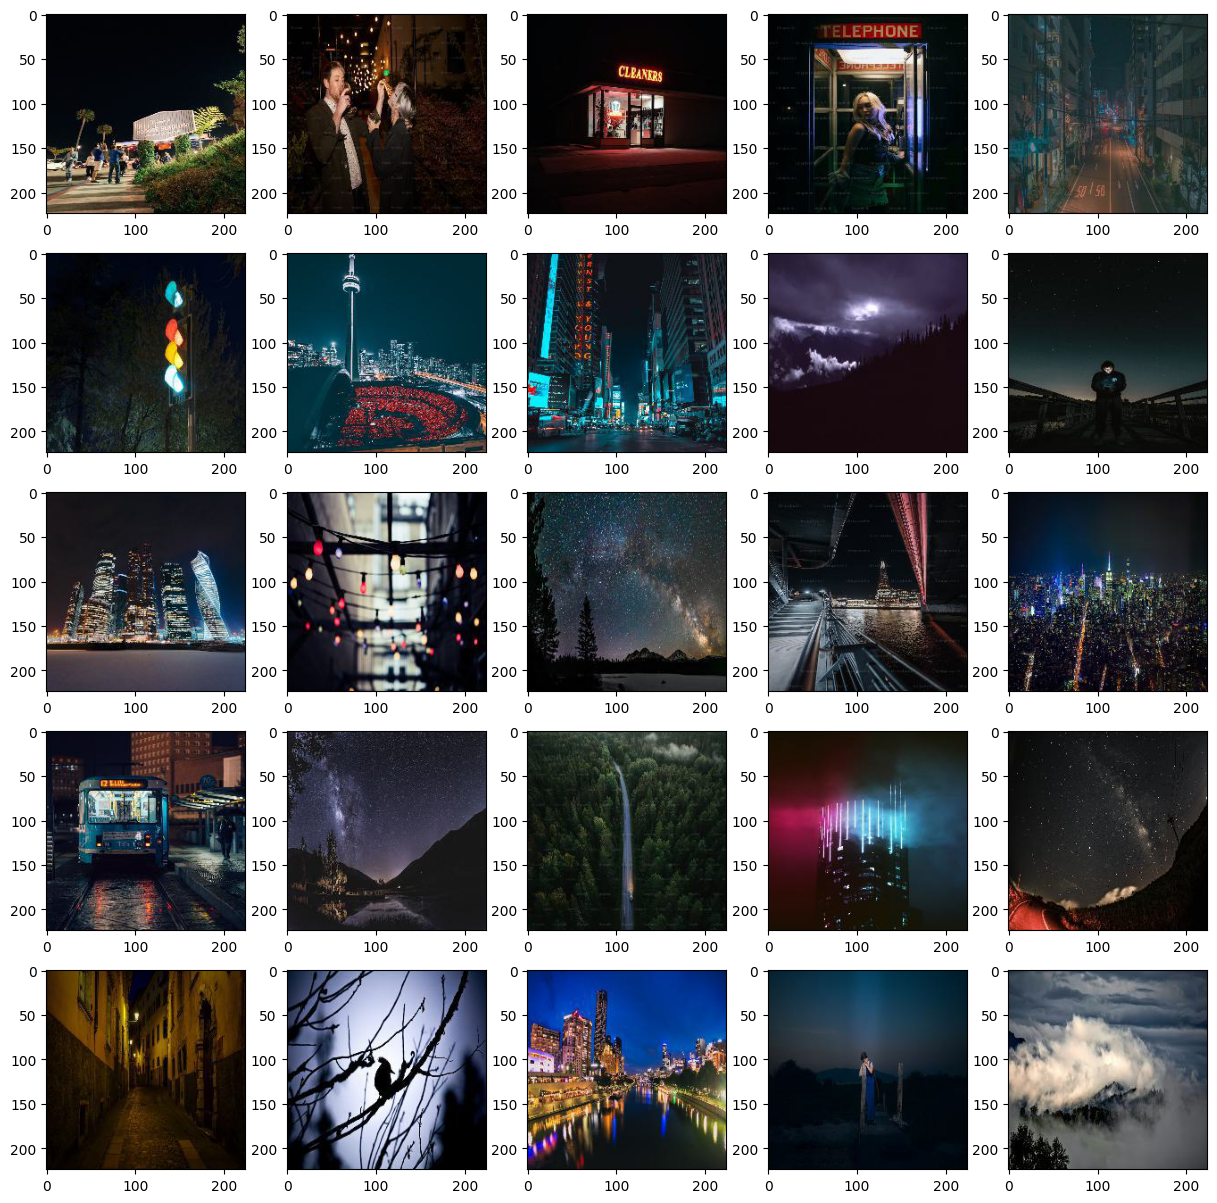

In [ ]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/noches'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/dias
!mkdir dataset/noches
!mkdir dataset/amanecer

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 94 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/dias'
carpeta_destino = '/content/dataset/dias'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 763:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/noches'
carpeta_destino = '/content/dataset/noches'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 763:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/amanecer'
carpeta_destino = '/content/dataset/amanecer'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 763:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/dias | wc -l
!ls /content/dataset/noches | wc -l
!ls /content/dataset/amanecer | wc -l

763
763
763


Found 1833 images belonging to 3 classes.
Found 456 images belonging to 3 classes.


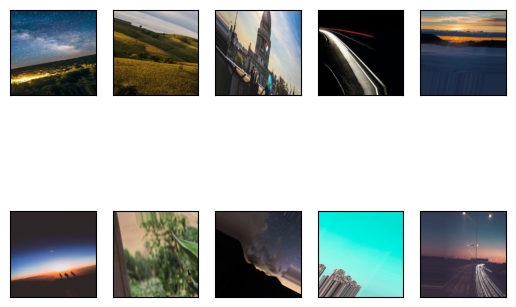

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 30

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)
#print(data_gen_entrenamiento.n) numero de datos generados

Epoch 1/30
58/58 [==============================] - 47s 604ms/step - loss: 0.7014 - accuracy: 0.6901 - val_loss: 0.5356 - val_accuracy: 0.7961
Epoch 2/30
58/58 [==============================] - 29s 503ms/step - loss: 0.4503 - accuracy: 0.8309 - val_loss: 0.4527 - val_accuracy: 0.8268
Epoch 3/30
58/58 [==============================] - 34s 590ms/step - loss: 0.3890 - accuracy: 0.8511 - val_loss: 0.3712 - val_accuracy: 0.8531
Epoch 4/30
58/58 [==============================] - 35s 601ms/step - loss: 0.3634 - accuracy: 0.8620 - val_loss: 0.3853 - val_accuracy: 0.8684
Epoch 5/30
58/58 [==============================] - 34s 592ms/step - loss: 0.3483 - accuracy: 0.8702 - val_loss: 0.3845 - val_accuracy: 0.8487
Epoch 6/30
58/58 [==============================] - 34s 583ms/step - loss: 0.3265 - accuracy: 0.8729 - val_loss: 0.4001 - val_accuracy: 0.8355
Epoch 7/30
58/58 [==============================] - 35s 598ms/step - loss: 0.3364 - accuracy: 0.8702 - val_loss: 0.3480 - val_accuracy: 0.8816

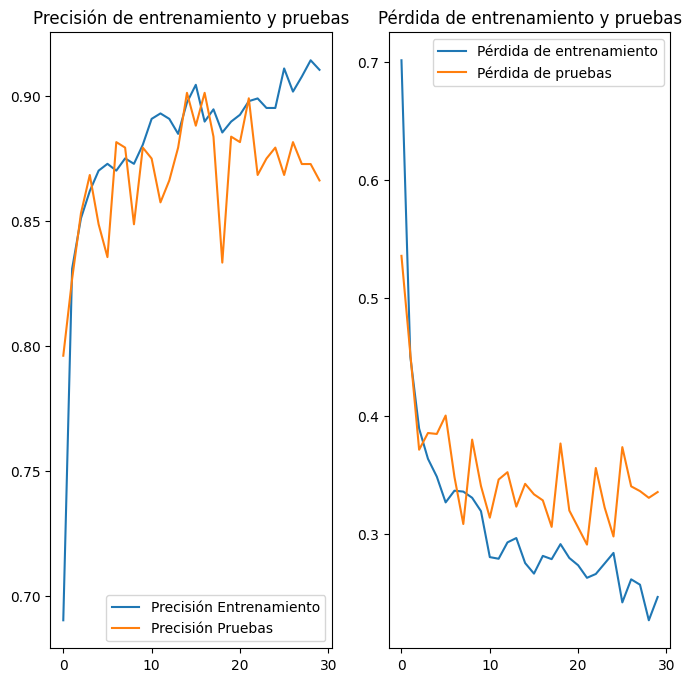

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(30)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
#0 = amanecer, 1 = dia, 2 = noche
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIH4mh2AEpCs7-jwggRcV9Vi9ahI02QKBv8A&usqp=CAU' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 25ms/step
0


In [ ]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida/modelo_jardin/1

In [ ]:
#Guardar el modelo en formato SavedModel
modelo.save('carpeta_salida/modelo_jardin/1')

In [ ]:
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r modelo_jardin.zip /content/carpeta_salida/modelo_jardin/

  adding: content/carpeta_salida/modelo_jardin/ (stored 0%)
  adding: content/carpeta_salida/modelo_jardin/1/ (stored 0%)
  adding: content/carpeta_salida/modelo_jardin/1/fingerprint.pb (stored 0%)
  adding: content/carpeta_salida/modelo_jardin/1/keras_metadata.pb (deflated 80%)
  adding: content/carpeta_salida/modelo_jardin/1/assets/ (stored 0%)
  adding: content/carpeta_salida/modelo_jardin/1/saved_model.pb (deflated 92%)
  adding: content/carpeta_salida/modelo_jardin/1/variables/ (stored 0%)
  adding: content/carpeta_salida/modelo_jardin/1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/carpeta_salida/modelo_jardin/1/variables/variables.index (deflated 78%)
